# Profitable App Profiles for Google Play Markets

Our aim in this project is to help android developers to find mobile app profiles that are profitable for  Google Play markets. That enable the developers to make data-driven decisions with respect to the kind of apps they build. Suppose that the develpers build apps that are free to download and install, where source of revenue consists of in-app ads. This means that the revenue for any given app is mostly influenced by the number of users  use  app.

Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.


 ### Datasets:

https://www.kaggle.com/datasets/lava18/google-play-store-apps

`googleplaystore.csv`: A dataset containing data about approximately ten thousand Android apps from Google Play.

`googleplaystore_user_reviews.csv`: A dataset containing data of tens of thousands of users reviews of google play apps.

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
playstore = pd.read_csv("dataset/googleplaystore.csv")    

In [3]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Inspecting Datasets

In [4]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##### Isolating the free apps since we are interested only on it

In [6]:
free_apps = playstore[playstore['Type'] == 'Free']
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
free_apps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10039 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10039 non-null  object 
 1   Category        10039 non-null  object 
 2   Rating          8719 non-null   float64
 3   Reviews         10039 non-null  object 
 4   Size            10039 non-null  object 
 5   Installs        10039 non-null  object 
 6   Type            10039 non-null  object 
 7   Price           10039 non-null  object 
 8   Content Rating  10039 non-null  object 
 9   Genres          10039 non-null  object 
 10  Last Updated    10039 non-null  object 
 11  Current Ver     10033 non-null  object 
 12  Android Ver     10038 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
free_apps.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## Data Cleaning

### Removing duplicated entries (App Name)

In [9]:
free_apps.duplicated().unique()

array([False,  True])

In [10]:
# duplicated enteries
duplicated = free_apps[free_apps['App'].duplicated()]
duplicated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [11]:
free_apps=free_apps.drop_duplicates(subset = ['App'])

In [12]:
free_apps.duplicated().unique()

array([False])

In [13]:
free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8904 non-null   object 
 1   Category        8904 non-null   object 
 2   Rating          7594 non-null   float64
 3   Reviews         8904 non-null   object 
 4   Size            8904 non-null   object 
 5   Installs        8904 non-null   object 
 6   Type            8904 non-null   object 
 7   Price           8904 non-null   object 
 8   Content Rating  8904 non-null   object 
 9   Genres          8904 non-null   object 
 10  Last Updated    8904 non-null   object 
 11  Current Ver     8898 non-null   object 
 12  Android Ver     8903 non-null   object 
dtypes: float64(1), object(12)
memory usage: 973.9+ KB


<AxesSubplot:>

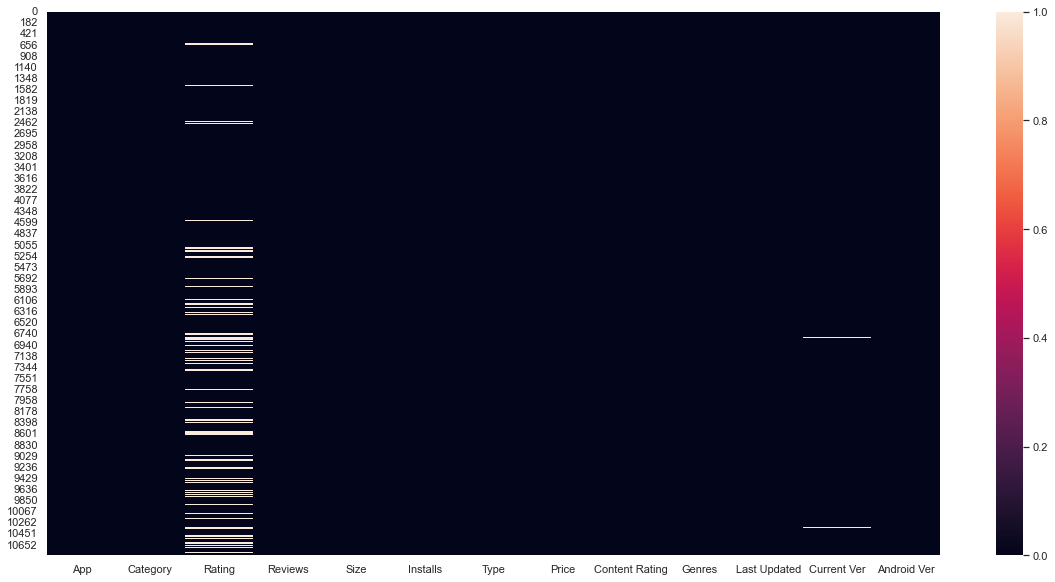

In [14]:
# to figure the missing data using heats map
plt.figure(figsize=(20,10))
sns.heatmap(free_apps.isna())

Rating column has most missing entries, so we will deal with it snice it is important column for our analysis

In [15]:
free_apps['Rating'].isna().sum()

1310

The Rating columns has 1310 Null entries, and to display it:

In [16]:
filterr = free_apps['Rating'].isna()
free_apps[filterr]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [17]:
free_apps['Rating'].describe()

count    7594.000000
mean        4.166395
std         0.534095
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

I find the best way to deal with missing data of rating is to fill it by the mean of the rating for each Genre, technically we will group the data frame by genre and fill the missing data of mean for each group

In [18]:
free_apps['Rating'] = free_apps.groupby('Genres')['Rating'].transform(lambda x: x.fillna(np.round(x.mean(),2)))

C:\Users\m\AppData\Local\Temp\ipykernel_19064\1371440092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_apps['Rating'] = free_apps.groupby('Genres')['Rating'].transform(lambda x: x.fillna(np.round(x.mean(),2)))


In [19]:
free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8904 non-null   object 
 1   Category        8904 non-null   object 
 2   Rating          8902 non-null   float64
 3   Reviews         8904 non-null   object 
 4   Size            8904 non-null   object 
 5   Installs        8904 non-null   object 
 6   Type            8904 non-null   object 
 7   Price           8904 non-null   object 
 8   Content Rating  8904 non-null   object 
 9   Genres          8904 non-null   object 
 10  Last Updated    8904 non-null   object 
 11  Current Ver     8898 non-null   object 
 12  Android Ver     8903 non-null   object 
dtypes: float64(1), object(12)
memory usage: 973.9+ KB


In [20]:
free_apps['Rating'].unique()

array([4.1 , 3.9 , 4.7 , 4.5 , 4.3 , 4.4 , 3.8 , 4.2 , 4.6 , 3.2 , 4.  ,
        nan, 4.8 , 4.9 , 3.6 , 3.7 , 4.28, 3.3 , 4.35, 3.4 , 3.5 , 3.1 ,
       4.17, 5.  , 3.  , 1.9 , 2.5 , 2.8 , 3.98, 2.7 , 1.  , 2.9 , 4.44,
       4.15, 4.18, 2.3 , 2.6 , 4.03, 3.87, 4.39, 4.04, 2.2 , 1.7 , 2.  ,
       4.25, 4.22, 4.14, 2.4 , 1.8 , 4.13, 4.08, 1.6 , 4.07, 4.23, 4.24,
       4.09, 4.11, 4.27, 2.1 , 1.4 , 4.36, 3.91, 4.34, 1.5 , 4.26, 1.2 ])

In [21]:
filterr = free_apps['Rating'].isna()
free_apps[filterr]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
6829,Bu Hangi Firma?,FAMILY,NaN,8,26M,100+,Free,0,Everyone,Trivia;Education,"December 10, 2017",3.3.6z,4.0.3 and up


In [22]:
free_apps['Rating'].fillna(round(free_apps['Rating'].mean(skipna=True),2),inplace=True)

C:\Users\m\AppData\Local\Temp\ipykernel_19064\3274336967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_apps['Rating'].fillna(round(free_apps['Rating'].mean(skipna=True),2),inplace=True)


In [23]:
filterr = free_apps['Rating'].isna()
free_apps[filterr]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8904 non-null   object 
 1   Category        8904 non-null   object 
 2   Rating          8904 non-null   float64
 3   Reviews         8904 non-null   object 
 4   Size            8904 non-null   object 
 5   Installs        8904 non-null   object 
 6   Type            8904 non-null   object 
 7   Price           8904 non-null   object 
 8   Content Rating  8904 non-null   object 
 9   Genres          8904 non-null   object 
 10  Last Updated    8904 non-null   object 
 11  Current Ver     8898 non-null   object 
 12  Android Ver     8903 non-null   object 
dtypes: float64(1), object(12)
memory usage: 973.9+ KB


In [25]:

free_apps['Installs']= free_apps['Installs'].str.replace('+','').str.replace(',','').astype('int')

C:\Users\m\AppData\Local\Temp\ipykernel_19064\4236807880.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  free_apps['Installs']= free_apps['Installs'].str.replace('+','').str.replace(',','').astype('int')
C:\Users\m\AppData\Local\Temp\ipykernel_19064\4236807880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_apps['Installs']= free_apps['Installs'].str.replace('+','').str.replace(',','').astype('int')


In [26]:
free_apps['Reviews'] = free_apps['Reviews'].astype('int')

C:\Users\m\AppData\Local\Temp\ipykernel_19064\4051020462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_apps['Reviews'] = free_apps['Reviews'].astype('int')


## Analysis

### Which categories have more installs, more reviews, with best rating?

#### Number of apps for each category with frequency table

In [27]:
category_freq = pd.DataFrame(free_apps['Category'].value_counts())

In [28]:
category_freq['frequency'] = category_freq/category_freq.sum() * 100

In [29]:
category_freq.sort_values('frequency', ascending = False)

,Category,frequency
FAMILY,1648,18.508535
GAME,877,9.849506
TOOLS,750,8.423181
BUSINESS,408,4.582210
LIFESTYLE,350,3.930818
PRODUCTIVITY,346,3.885894
FINANCE,328,3.683738
MEDICAL,313,3.515274
SPORTS,301,3.380503
PERSONALIZATION,295,3.313118


Text(0, 0.5, 'Number of apps')

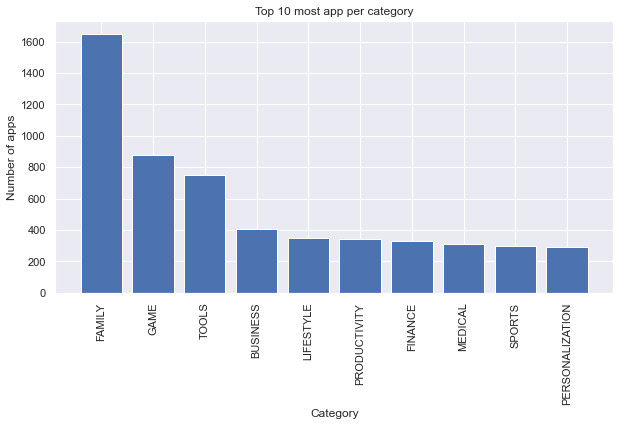

In [30]:
#Only first 10 categories
plt.figure(figsize=(10,5))
plt.bar(category_freq.index[0:10], category_freq.iloc[0:10,0])
plt.title('Top 10 most app per category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of apps')


We see that family, game, tools, business, lifestyle, and productivity categories are the top 5 categories with number of apps

#### Categories with more number of installs

In [31]:
no_of_installs = free_apps.groupby('Category')['Installs'].sum().reset_index().sort_values('Installs',ascending = False)
no_of_installs

,Category,Installs
14,GAME,1.385792e+10
6,COMMUNICATION,1.103692e+10
29,TOOLS,8.100044e+09
25,PRODUCTIVITY,5.791679e+09
27,SOCIAL,5.487862e+09
24,PHOTOGRAPHY,4.647269e+09
11,FAMILY,4.407292e+09
31,VIDEO_PLAYERS,3.926832e+09
30,TRAVEL_AND_LOCAL,2.894704e+09
21,NEWS_AND_MAGAZINES,2.369212e+09


Text(0, 0.5, 'Number of installs')

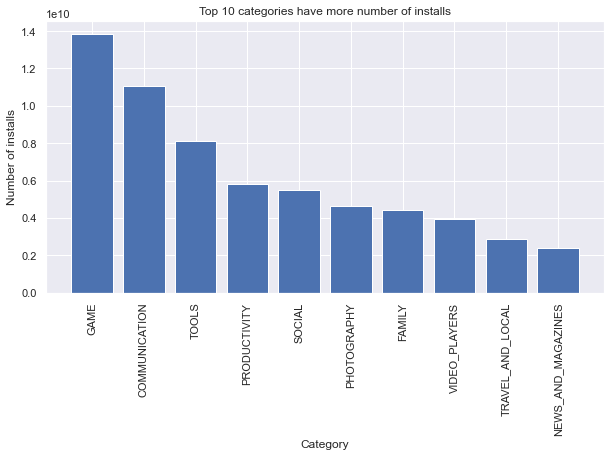

In [32]:
#Top 10 categories
installs_top10 = no_of_installs.head(10)
plt.figure(figsize=(10,5))
plt.bar(installs_top10['Category'], installs_top10['Installs'])
plt.title('Top 10 categories have more number of installs')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of installs')


Game, Communication, tools, productivity, and social are the top 5 categories have the most number of installs

#### Categories with more number of reviews

In [33]:
no_of_reviews = free_apps.groupby('Category')['Reviews'].sum().reset_index().sort_values('Reviews',ascending = False)
no_of_reviews

,Category,Reviews
14,GAME,620725858
6,COMMUNICATION,285727154
29,TOOLS,229225411
27,SOCIAL,227927559
11,FAMILY,140192916
24,PHOTOGRAPHY,105236039
31,VIDEO_PLAYERS,67471201
25,PRODUCTIVITY,55418928
23,PERSONALIZATION,53249927
26,SHOPPING,44551246


Text(0, 0.5, 'Number of reviews')

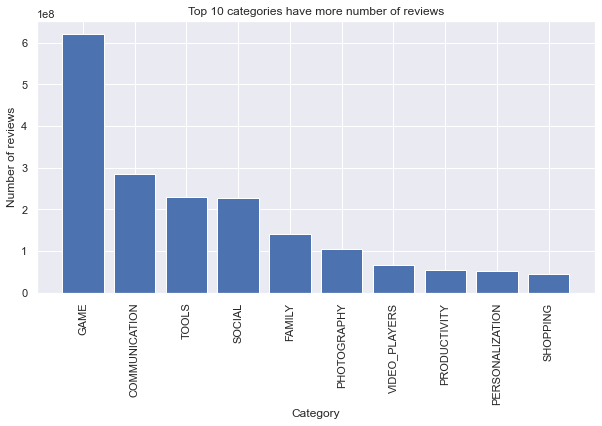

In [34]:
#Top 10 categories
reviews_top10 = no_of_reviews.head(10)
plt.figure(figsize=(10,5))
plt.bar(reviews_top10['Category'], reviews_top10['Reviews'])
plt.title('Top 10 categories have more number of reviews')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of reviews')

Game, communication, tools, social and family categories have more number of reviews

#### Categories with best rating

In [35]:
# no of apps that have rating of 4 or more
apps_best_rating = free_apps.loc[free_apps['Rating'] >= 4 ,['App','Category','Rating']]
apps_best_rating

,App,Category,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30
5,Paper flowers instructions,ART_AND_DESIGN,4.40
...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00
10838,Parkinson Exercices FR,MEDICAL,4.15
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50


In [36]:
# Categories that have more number of apps that have best ratting of 4 or more
cat_ratings = apps_best_rating['Category'].value_counts()
cat_ratings

FAMILY                 1268
GAME                    738
TOOLS                   538
BUSINESS                335
PRODUCTIVITY            293
PERSONALIZATION         267
LIFESTYLE               260
FINANCE                 256
SPORTS                  254
MEDICAL                 250
COMMUNICATION           236
HEALTH_AND_FITNESS      231
PHOTOGRAPHY             216
SOCIAL                  202
NEWS_AND_MAGAZINES      197
SHOPPING                170
BOOKS_AND_REFERENCE     167
TRAVEL_AND_LOCAL        154
EDUCATION               109
VIDEO_PLAYERS           107
MAPS_AND_NAVIGATION      88
FOOD_AND_DRINK           88
DATING                   82
ENTERTAINMENT            72
LIBRARIES_AND_DEMO       67
AUTO_AND_VEHICLES        64
EVENTS                   60
HOUSE_AND_HOME           58
WEATHER                  57
ART_AND_DESIGN           54
PARENTING                46
BEAUTY                   46
COMICS                   40
Name: Category, dtype: int64

Text(0, 0.5, 'Number of apps')

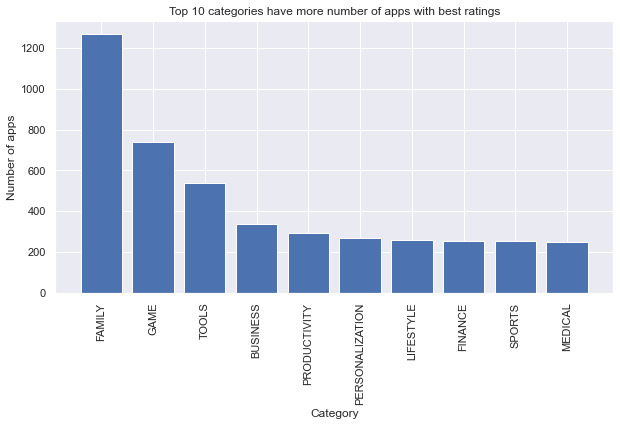

In [37]:
cat_ratings_top10 = cat_ratings.head(10)

plt.figure(figsize=(10,5))
plt.bar(cat_ratings_top10.index, cat_ratings_top10.values)
plt.title('Top 10 categories have more number of apps with best ratings')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of apps')

Family, Game, Tools, Business and Productivity are the top 5 categoires have the most apps with best ratings

### Results

- Family, game, tools, business, lifestyle, and productivity categories are the top 5 categories with number of apps.
- Game, Communication, tools, productivity, and social are the top 5 categories have the most number of installs.
- Game, communication, tools, social and family categories have more number of reviews.
- Family, Game, Tools, Business and Productivity are the top 5 categoires have the most apps with best ratings.

### To be continued: sentiment analysis on user's reviews, and machine learning prediction for any upcoming app (ex: will the new app has a positive or negative review, and how much rating will has?)